# Random Walk Simulation

A random walk is a mathematical object, known as a stochastic or random process, that describes a path consisting of a succession of random steps. In simple terms, it's a sequence of steps where each step is chosen randomly.

# 1D Random Walks

### Simple Random Walk

In [10]:
import random

# Number of steps
n_steps = 1000

# Initialize the position
position = 0

# Perform the random walk
for _ in range(n_steps):
    step = random.choice([-1, 1])  # Choose a step direction
    position += step  # Update the position
    
print(f"{position = }")

position = 14


In [13]:
import random

def simple_random_walk_1d(n_steps: int = 1000, position: int = 0) -> int:
    positions = [position]
    for _ in range(n_steps):
        step = random.choice([-1, 1])  # Choose a step direction
        positions.append(positions[-1] + step)  # Update the position
        
    return positions

4


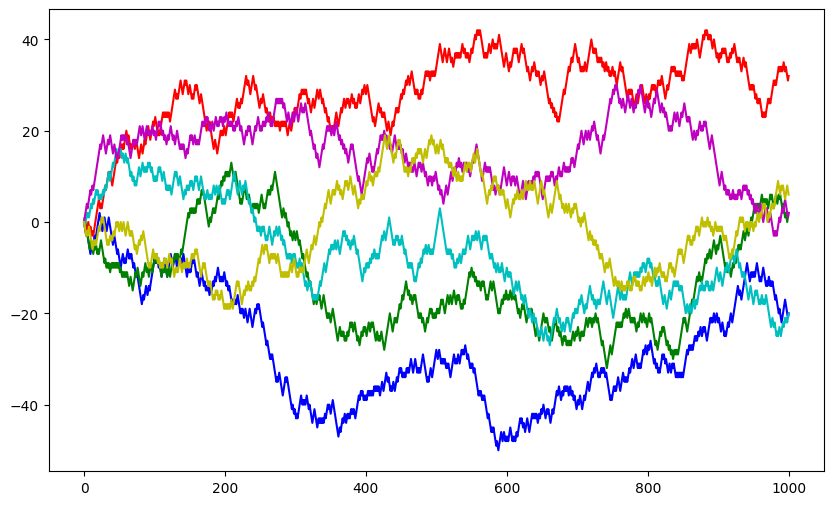

In [18]:
import matplotlib.pyplot as plt

# Define a list of colors
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Number of times to call the function
n_calls = 6

# Call the function and plot the positions
plt.figure(figsize=(10, 6))
for i in range(n_calls):
    positions = simple_random_walk_1d()
    plt.plot(positions, color=colors[i % len(colors)])

plt.show()

### Random Walk with Drift

In [11]:
import numpy as np

# Number of steps
n_steps = 1000

# Initialize the position
position = 0

# Perform the random walk with drift
for _ in range(n_steps):
    step = np.random.choice([-1, 1], p=[0.4, 0.6])  # Choose a step direction with bias
    position += step  # Update the position
    
print(f"{position = }")

position = 202


### Random Walk with Varying Step Sizes

In [13]:
import random

# Number of steps
n_steps = 1000

# Initialize the position
position = 0

# Perform the random walk with varying step sizes
for _ in range(n_steps):
    step = random.choice([-1, 1]) * random.uniform(0.5, 1.5)  # Choose a step direction and size
    position += step  # Update the position
    
print(f"{position = }")

position = 16.880609028632495


# 2D Random Walks

### Simple Random Walk

Final position: [ 5. -2.]


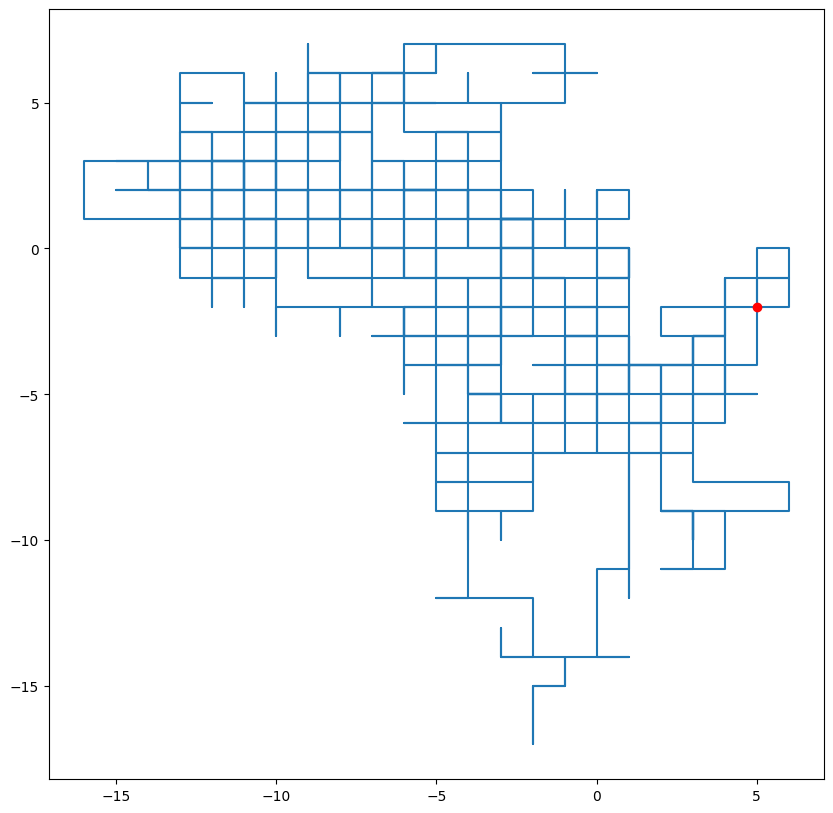

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of steps
n_steps = 1000

# Initialize the positions
positions = np.zeros((n_steps, 2))

# Define the possible steps
steps = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])

# Perform the random walk
for i in range(1, n_steps):
    # Choose a random step
    step = steps[np.random.randint(0, 4)]
    
    # Update the position
    positions[i] = positions[i - 1] + step

# Print the final position
print(f"Final position: {positions[-1]}")

# Plot the positions
plt.figure(figsize=(10, 10))
plt.plot(positions[:, 0], positions[:, 1])

# Highlight the final position
plt.plot(positions[-1, 0], positions[-1, 1], 'ro')  # 'ro' specifies a red circle marker

plt.show()

### Simple Random Walk (Animation)

/var/folders/4g/9m57fnd11dz8t306ljlfswdm0000gp/T/ipykernel_3065/469525336.py:38: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(positions[i, 0], positions[i, 1])


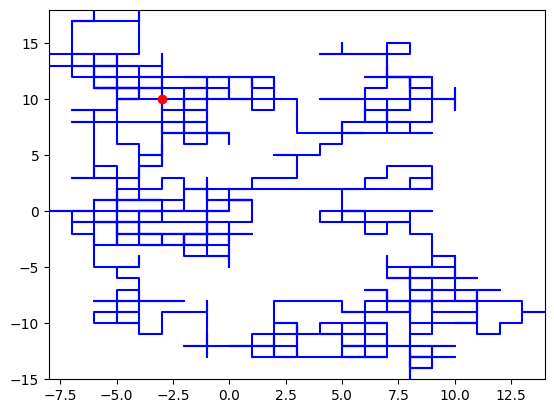

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Number of steps
n_steps = 1000

# Initialize the positions
positions = np.zeros((n_steps, 2))

# Define the possible steps
steps = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])

# Perform the random walk
for i in range(1, n_steps):
    # Choose a random step
    step = steps[np.random.randint(0, 4)]
    
    # Update the position
    positions[i] = positions[i - 1] + step

# Create the figure and axis objects
fig, ax = plt.subplots()

# Initialize the plot
line, = ax.plot([], [], 'b-')
point, = ax.plot([], [], 'ro')

# Define the initialization function
def init():
    ax.set_xlim(np.min(positions[:, 0]), np.max(positions[:, 0]))
    ax.set_ylim(np.min(positions[:, 1]), np.max(positions[:, 1]))
    return line, point,

# Define the update function
def update(i):
    line.set_data(positions[:i, 0], positions[:i, 1])
    point.set_data(positions[i, 0], positions[i, 1])
    return line, point,

# Create the animation
ani = FuncAnimation(fig, update, frames=n_steps, init_func=init, blit=True)

# Save the animation
ani.save('output/2d_simple_random_walk.gif', writer='pillow')

In [ ]:
from IPython.display import HTML

# Display the animation
HTML(ani.to_jshtml())

### Random Walk with Drift and Varying Step Size

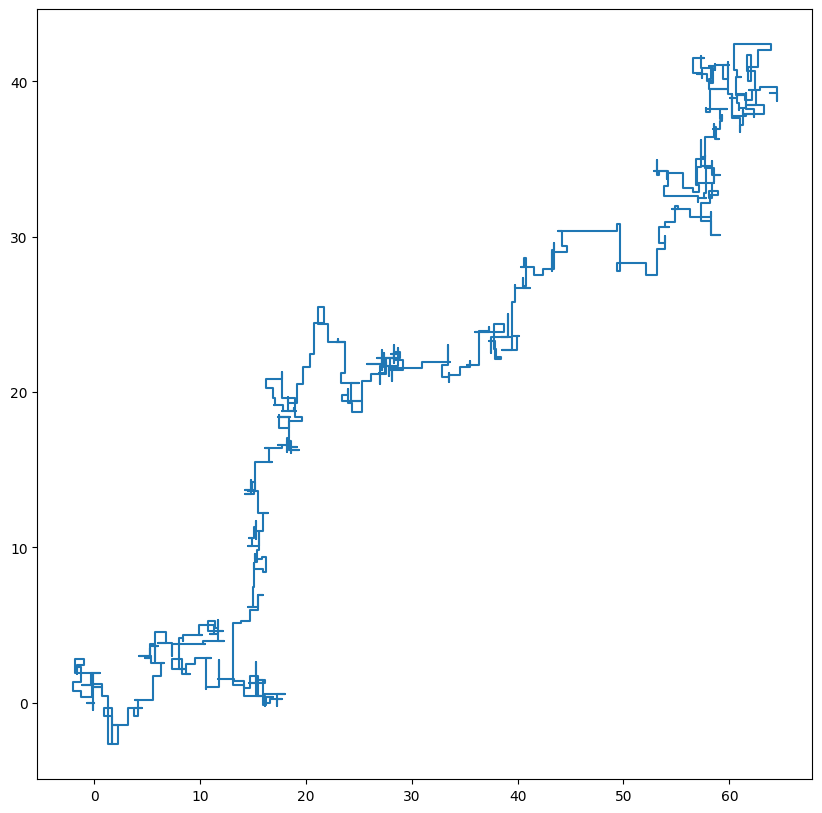

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of steps
n_steps = 1000

# Initialize the positions
positions = np.zeros((n_steps, 2))

# Define the possible steps
steps = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])

# Define the drift as a bias towards certain directions
# For example, this bias makes positive x and y steps more likely
drift = np.array([0.3, 0.2, 0.3, 0.2])

# Normalize the drift to get probabilities
drift = drift / np.sum(drift)

# Perform the random walk
for i in range(1, n_steps):
    # Choose a random step with bias
    step = steps[np.random.choice(4, p=drift)]
    
    # Vary the step size
    step_size = np.random.uniform(0.1, 1)
    step = step * step_size
    
    # Update the position
    positions[i] = positions[i - 1] + step

# Plot the positions
plt.figure(figsize=(10, 10))
plt.plot(positions[:, 0], positions[:, 1])
plt.show()

### Random Walk with Drift and Varying Step Size (Animation)

/var/folders/4g/9m57fnd11dz8t306ljlfswdm0000gp/T/ipykernel_3065/1056848868.py:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(positions[i, 0], positions[i, 1])


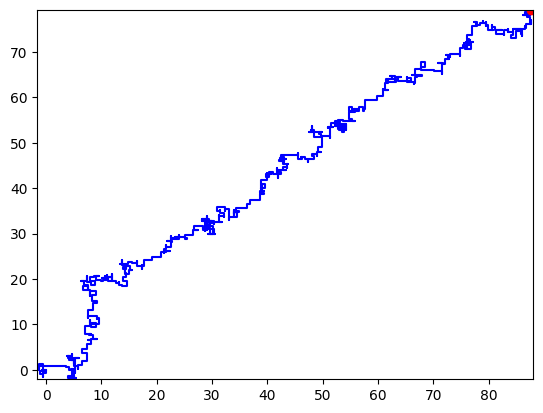

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Number of steps
n_steps = 1000

# Initialize the positions
positions = np.zeros((n_steps, 2))

# Define the possible steps
steps = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])

# Define the drift as a bias towards certain directions
drift = np.array([0.3, 0.2, 0.3, 0.2])

# Normalize the drift to get probabilities
drift = drift / np.sum(drift)

# Perform the random walk
for i in range(1, n_steps):
    # Choose a random step with bias
    step = steps[np.random.choice(4, p=drift)]
    
    # Vary the step size
    step_size = np.random.uniform(0.1, 1)
    step = step * step_size
    
    # Update the position
    positions[i] = positions[i - 1] + step

# Create the figure and axis objects
fig, ax = plt.subplots()

# Initialize the plot
line, = ax.plot([], [], 'b-')
point, = ax.plot([], [], 'ro')

# Define the initialization function
def init():
    ax.set_xlim(np.min(positions[:, 0]), np.max(positions[:, 0]))
    ax.set_ylim(np.min(positions[:, 1]), np.max(positions[:, 1]))
    return line, point,

# Define the update function
def update(i):
    line.set_data(positions[:i, 0], positions[:i, 1])
    point.set_data(positions[i, 0], positions[i, 1])
    return line, point,

# Create the animation
ani = FuncAnimation(fig, update, frames=n_steps, init_func=init, blit=True)

# Save the animation
ani.save('output/2d_random_walk_drift.mp4', writer='ffmpeg')

In [ ]:
from IPython.display import HTML

# Display the animation
HTML(ani.to_jshtml())